### Tourism Case Study

### Context
Tourism is now recognized as a directly measurable activity, enabling more accurate analysis and more effective policies can be made for tourism. Whereas previously the sector relied mostly on approximations from related areas of measurement (e.g. Balance of Payments statistics), tourism nowadays is a productive activity that can be analyzed using factors like economic indicators, social indicators, environmental & infrastructure indicators, etc. As a Data Scientist in a leading tours and travels company, you have been assigned the task of analyzing several of these factors and group countries based on them to help understand the key locations where the company can invest in tourism services.

### Objective
To explore the data and identify different groups of countries based on important factors to find key locations where investments can be made to promote tourism services.

### Key Questions
- How many different groups/clusters of countries can be found from the data?
- How do the different clusters vary?
- How to use PCA to retain the components which explain variance of more than 40%?
- How to perform clustering using the components obtained from PCA?

### Data Description
This dataset contains key statistical indicators of the countries. It covers sections like general information, economic indicators, social indicators, environmental & infrastructural indicators.

##### Data Dictionary

- country: country
- Region: region of the country
- Surface area: Surface area in sq. km
- Population in thousands: Population of the country, in thousands, as in the year 2017
- Population density: Population density per km2, as in the year 2017
- GDP: Gross domestic product: GDP of the country in million USD
- Economy: Agriculture: Contribution of agriculture to the economy as a percentage of Gross Value Added
- Economy: Industry: Contribution of the industry to the economy as a percentage of Gross Value Added
- Economy: Services and other activity: Contribution of services and other activities to the economy as a percentage of Gross Value Added
- International trade: Balance: Amount, in million USD, of balance between international exports and imports
- Health: Total expenditure: Total expenditure on healthcare facilities as a percentage of GDP
- Education: Government expenditure: Total expenditure on education as a percentage of GDP
- Mobile-cellular subscriptions: no. of mobile/cellular subscriptions per 100 people
- Individuals using the Internet: no. of individuals using the Internet per 100 people
- CO2 emission estimates: CO2 emission estimates in million tons

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('country_stats.csv')
df.head()

,country,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
0,Afghanistan,SouthernAsia,652864.0,35530,54.4,20270.0,23.3,23.3,53.3,-2110.0,8.2,3.3,61.6,42.0
1,Albania,SouthernEurope,28748.0,2930,106.9,11541.0,22.4,26.0,51.7,-2707.0,5.9,3.5,106.4,130.0
2,Algeria,NorthernAfrica,2381741.0,41318,17.3,164779.0,12.2,37.3,50.5,-17099.0,7.2,NaN,113.0,135.0
3,American Samoa,Polynesia,199.0,56,278.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
4,Andorra,SouthernEurope,468.0,77,163.8,2812.0,0.5,10.8,88.6,-1255.0,8.1,3.3,88.1,13.0


In [3]:
df.shape

(229, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               229 non-null    object 
 1   Region                                229 non-null    object 
 2   Surface area                          226 non-null    float64
 3   Population in thousands               229 non-null    int64  
 4   Population density                    229 non-null    float64
 5   GDP: Gross domestic product           208 non-null    float64
 6   Economy: Agriculture                  206 non-null    float64
 7   Economy: Industry                     208 non-null    float64
 8   Economy: Services and other activity  208 non-null    float64
 9   International trade: Balance          210 non-null    float64
 10  Health: Total expenditure             190 non-null    float64
 11  Education: Governme

In [5]:
df.describe(include='all')

,country,Region,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
count,229,229,2.260000e+02,2.290000e+02,229.000000,2.080000e+02,206.000000,208.000000,208.000000,210.000000,190.000000,148.000000,209.000000,228.000000
unique,229,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.932100e+05,3.275679e+04,462.824891,3.538963e+05,11.481553,27.565385,61.089423,-683.861905,6.763158,4.570946,107.360287,200.017544
std,NaN,NaN,1.796021e+06,1.332751e+05,2305.384253,1.548160e+06,12.100601,13.124423,15.504890,73188.172715,2.798017,1.781128,43.063860,296.444644
min,NaN,NaN,1.000000e-05,1.000000e+00,0.100000,3.300000e+01,0.000010,4.000000,14.900000,-796494.000000,1.500000,1.000000,7.000000,1.000000
25%,NaN,NaN,4.306500e+03,4.310000e+02,35.900000,4.987000e+03,2.400000,19.075000,51.000000,-3501.250000,4.825000,3.200000,79.400000,55.750000
50%,NaN,NaN,8.373550e+04,5.448000e+03,88.100000,2.387100e+04,7.200000,26.450000,61.300000,-984.000000,6.350000,4.550000,108.200000,97.500000
75%,NaN,NaN,4.376935e+05,1.919300e+04,222.800000,1.745518e+05,17.500000,33.325000,72.100000,49.250000,8.375000,5.500000,130.600000,196.250000


### Data Preprocessing

##### Checking for Null Values¶

In [6]:
df.isnull().sum()

country                                  0
Region                                   0
Surface area                             3
Population in thousands                  0
Population density                       0
GDP: Gross domestic product             21
Economy: Agriculture                    23
Economy: Industry                       21
Economy: Services and other activity    21
International trade: Balance            19
Health: Total expenditure               39
Education: Government expenditure       81
Mobile-cellular subscriptions           20
Individuals using the Internet           1
dtype: int64

##### How do impute the missing values?
For numerical columns, central tendency measures such as mean or median can be used to impute the missing values.
 1. If the columns having missing values are of a normally distributed (Symmetric), then mean can be used to impute.
 2. If the columns having missing values are right/left skewed, then median can be used to impute.
For categorical columns, then mode can be used to impute the missing values.
From the above univariate analysis, we can observe that most of the columns are right-skewed. So, we will impute the missing values by the median of the attributes grouped by region.

In [7]:
for col in df.iloc[:,2:].columns.tolist():
    df[col] = df.groupby(['Region'])[col].transform(lambda x: x.fillna(x.median()))
    
df.isna().sum()

country                                 0
Region                                  0
Surface area                            0
Population in thousands                 0
Population density                      0
GDP: Gross domestic product             0
Economy: Agriculture                    0
Economy: Industry                       0
Economy: Services and other activity    0
International trade: Balance            0
Health: Total expenditure               0
Education: Government expenditure       0
Mobile-cellular subscriptions           0
Individuals using the Internet          0
dtype: int64

In [8]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df.drop(['country','Region'], axis=1)), columns=df.drop(['country','Region'], axis=1).columns)

df_scaled.head()

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
0,0.035310,0.020854,-0.177549,-0.210173,1.042856,-0.274480,-0.553324,-0.022866,0.477955,-0.768586,-1.047607,-0.532544
1,-0.315158,-0.224289,-0.154727,-0.216092,0.966043,-0.064870,-0.659127,-0.031399,-0.364263,-0.669595,0.012310,-0.234595
2,1.006147,0.064378,-0.193677,-0.112187,0.095503,0.812389,-0.738478,-0.237101,0.111773,0.716281,0.168458,-0.217666
3,-0.331189,-0.245901,-0.080260,-0.223645,-0.152004,-1.159503,0.326156,0.006091,0.111773,-0.471613,-1.036960,-0.363255
4,-0.331038,-0.245743,-0.129991,-0.222011,-0.903058,-1.244900,1.780935,-0.010646,0.441337,-0.768586,-0.420647,-0.630731


In [9]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0,0]

for dm in distance_metrics:
    for lm in linkage_methods:
        z= linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(z, pdist(df_scaled))
        print("Cophenetic correlation for {} distance and {} linkage is {}.".format(dm.capitalize(), lm, c))
        
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.9155400692823863.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7825108242995893.
Cophenetic correlation for Euclidean distance and average linkage is 0.9346981702379014.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8344399530606008.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9095973699627771.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.842117178747162.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9141365131195625.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8792996800400401.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8449434742316889.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7845772349957595.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8729332119700153.
Cophenetic cor

In [10]:
print("Highest copheneic correlation is {}, which is obtained with {} distance and {} linkage.".format(high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]))

Highest copheneic correlation is 0.8792996800400401, which is obtained with Chebyshev distance and weighted linkage.


### Let's explore different linkage methods with Euclidean distance only.

In [11]:
linkage_method = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_method:
    z = linkage(df_scaled, metric = 'euclidean', method = lm)
    c, coph_dists = cophenet(z, pdist(df_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr =c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9155400692823863.
Cophenetic correlation for complete linkage is 0.7825108242995893.
Cophenetic correlation for average linkage is 0.9346981702379014.
Cophenetic correlation for centroid linkage is 0.9484608827294534.
Cophenetic correlation for ward linkage is 0.4666407735353128.
Cophenetic correlation for weighted linkage is 0.8344399530606008.


In [12]:
print("Highest cophenetic correlation is {}, which is obtained with {} linkage.". format(high_cophenet_corr, high_dm_lm[1]))

Highest cophenetic correlation is 0.9484608827294534, which is obtained with centroid linkage.


We see that the cophenetic correlation is maximum with Euclidean distance and centroid linkage.

Let's see the dendrograms for the different linkage methods.

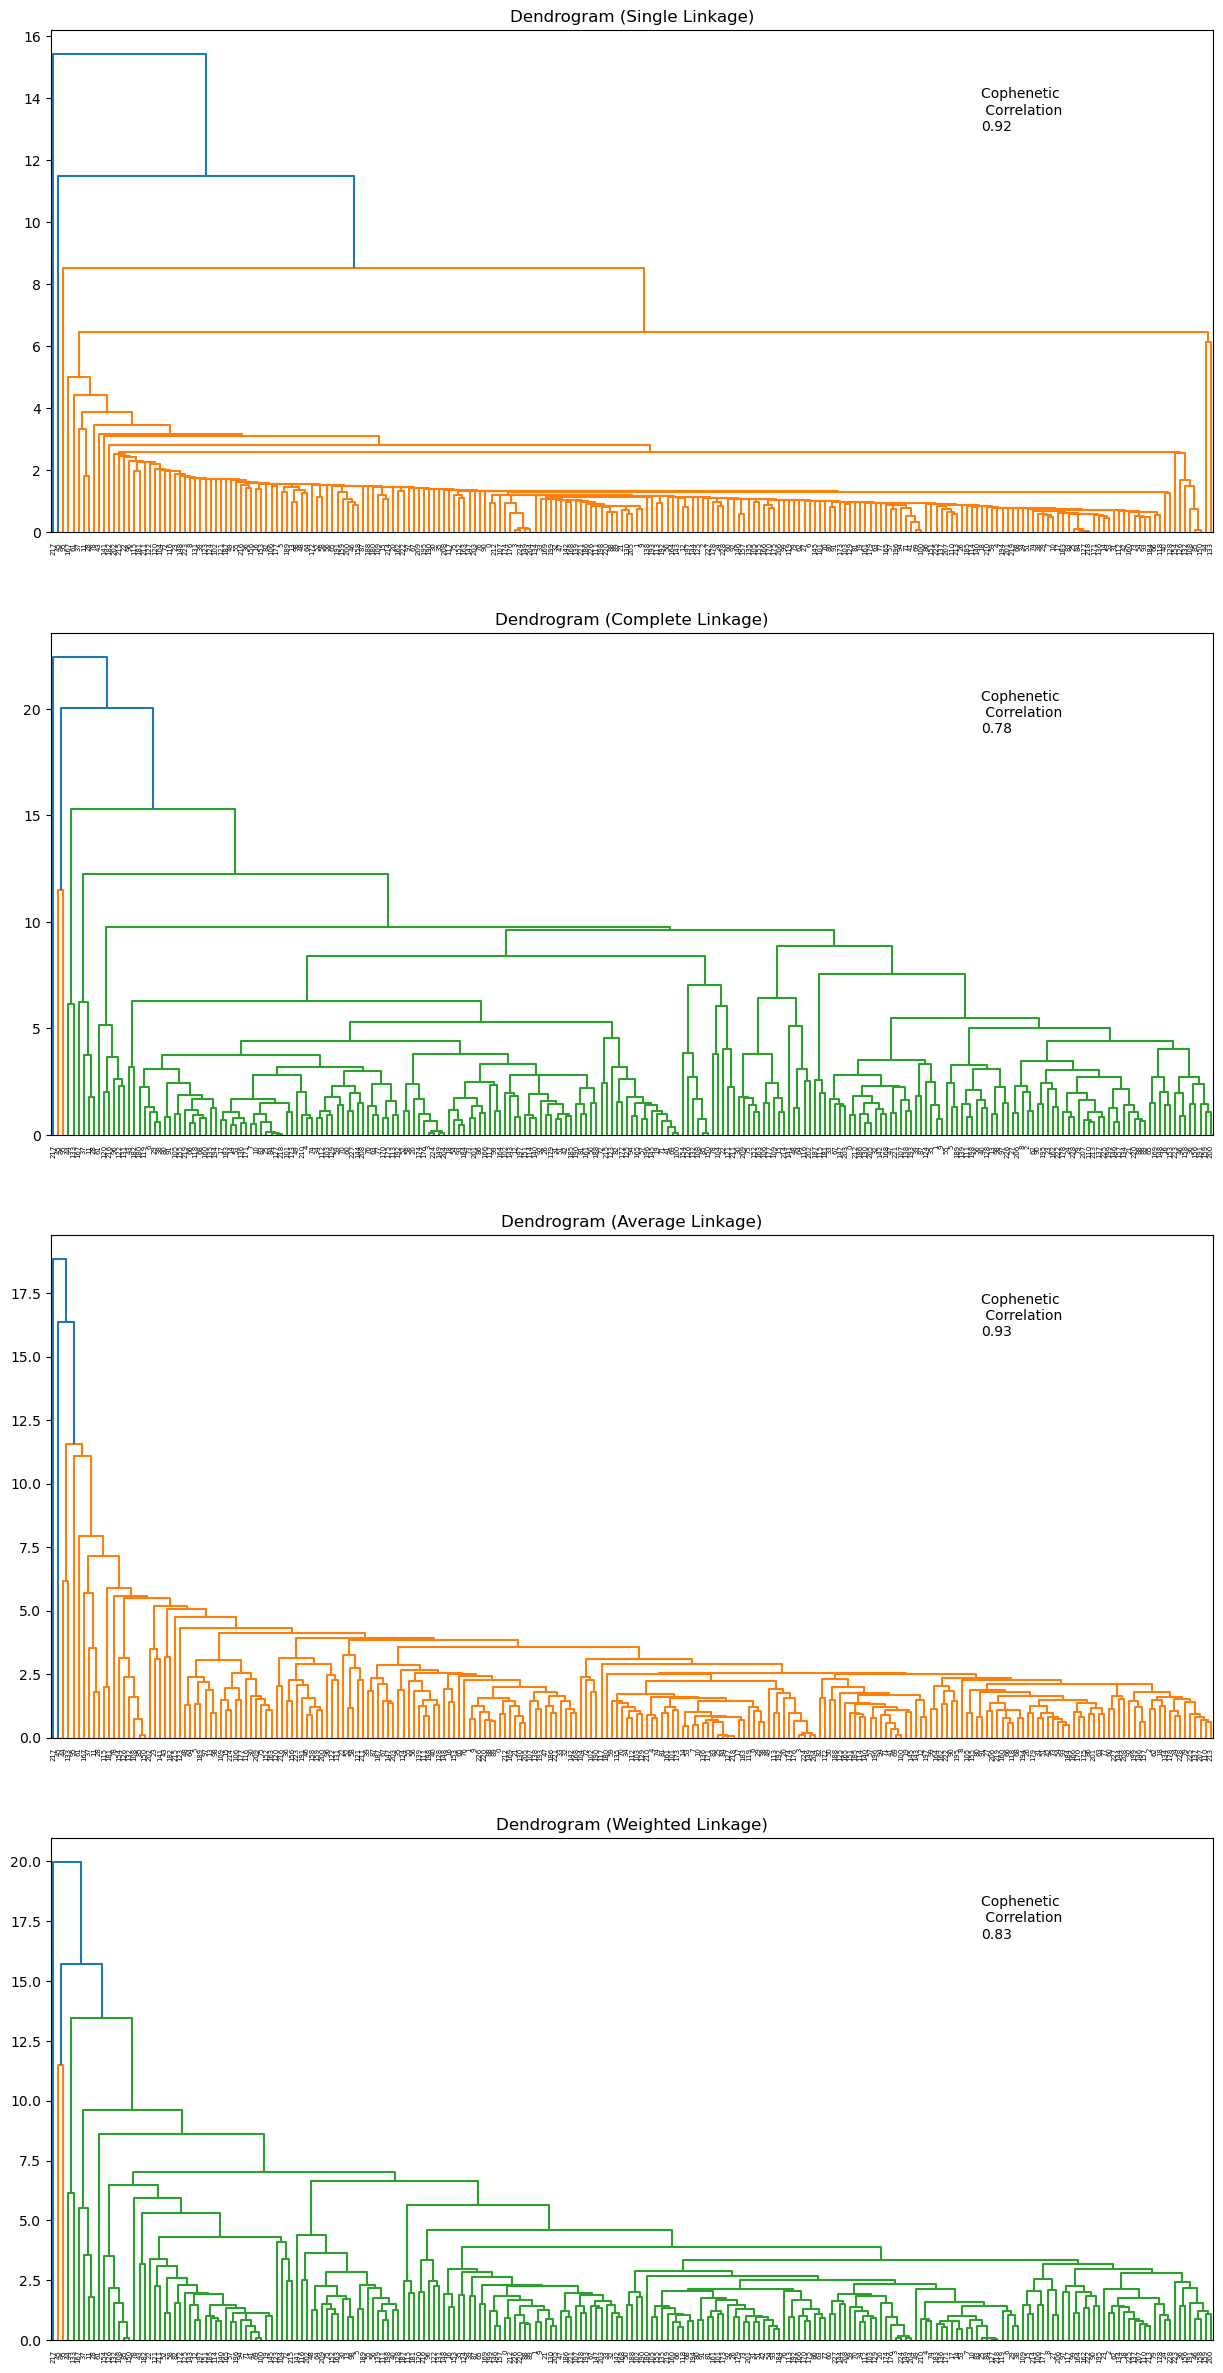

In [14]:
linkage_method = ["single", "complete", "average", "centroid", "ward", "weighted"]

compare_cols = ["Linkage", "Cophenetic Coefficient"]

fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15,30))

for i, method in enumerate(linkage_methods):
    z = linkage(df_scaled, metric="euclidean", method = method)
    dendrogram(z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    coph_corr, coph_dist = cophenet(z, pdist(df_scaled))
    axs[i].annotate(f"Cophenetic \n Correlation\n{coph_corr:0.2f}",(0.80,0.80), xycoords = 'axes fraction'),

### Observations

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with Centroid linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for Centroid linkage.


The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters. The dendrogram for centroid linkage had the highest cophenetic correlation. So we can use centroid linkage and have chosen 6 clusters as the dendrogram height is pretty high. (The maximum height is for 3, but that would not be meaningful as it would give two clusters with one country each and one cluster will all the other countries).

Lets visualize the dendrogram cut for average link in the below plot

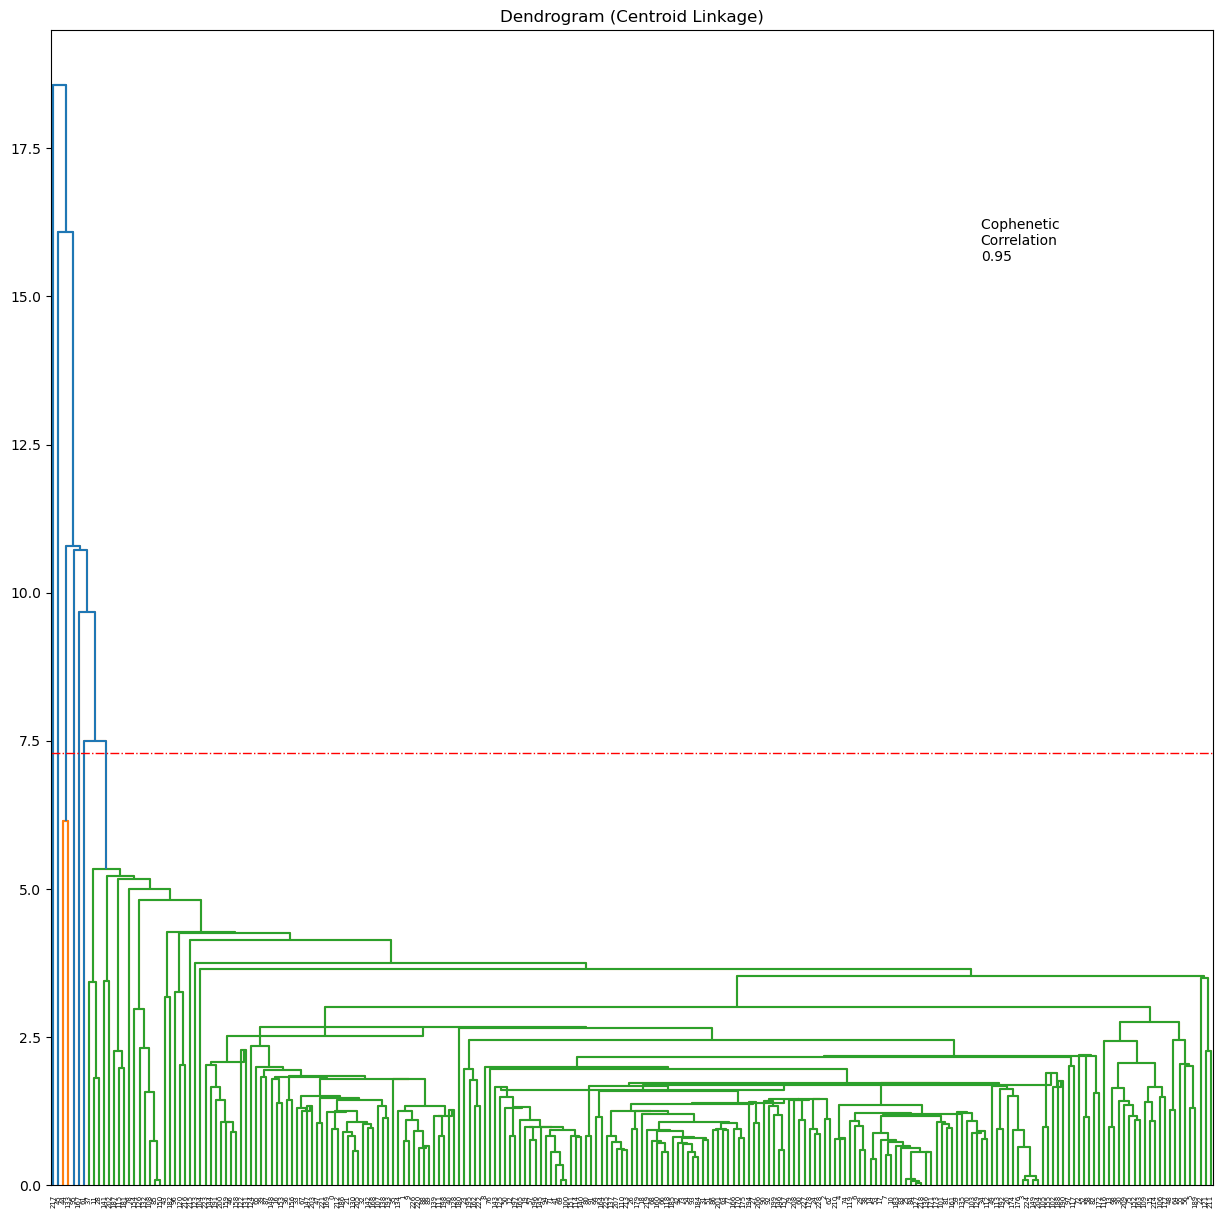

In [15]:
linkage_method = ["centroid"]

compare_cols = ["Linkage", "Cophenetic Coefficient"]

fig, axs = plt.subplots(len(linkage_method), 1, figsize=(15,15))

for i, method in enumerate(linkage_method):
    z = linkage(df_scaled, metric= 'euclidean', method= method)
    dendrogram(z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    coph_corr, coph_dist = cophenet(z, pdist(df_scaled))
    axs.annotate(f"Cophenetic \nCorrelation\n{coph_corr:0.2f}", (0.80, 0.80), xycoords = "axes fraction",)
    
dendrogram(z, color_threshold=7.3)
plt.axhline(y=7.3, c= "red", lw=1, linestyle = "dashdot")

### Hierarchical Clustering

In [16]:
HCmodel = AgglomerativeClustering(n_clusters= 6, affinity="euclidean", linkage="average")
HCmodel.fit(df_scaled)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [17]:
df_scaled["HC_Clusters"] = HCmodel.labels_
df['HC_Clusters'] = HCmodel.labels_

### Cluster Profiling

In [18]:
cluster_profile = df.groupby('HC_Clusters').mean()

/tmp/ipykernel_25283/1523405526.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profile = df.groupby('HC_Clusters').mean()


In [19]:
cluster_profile

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet
HC_Clusters,,,,,,,,,,,,
0,5.028178e+05,1.977965e+04,262.298655,1.980217e+05,11.18296,26.909193,61.452466,1020.163677,6.868386,4.890135,105.220852,177.587444
1,1.600000e+01,3.310000e+02,23395.700000,2.621800e+04,3.22500,10.000000,90.000000,8826.500000,5.375000,1.500000,206.600000,16.000000
2,2.572170e+05,1.662500e+04,66.900000,1.001770e+05,10.10000,34.100000,55.800000,609.000000,9.200000,5.000000,79.400000,2358.000000
3,9.833517e+06,3.244600e+05,35.500000,1.803665e+07,1.00000,19.700000,79.300000,-796494.000000,17.100000,5.400000,117.600000,1513.000000
4,3.287263e+06,1.339180e+06,450.400000,2.116239e+06,17.00000,29.700000,53.200000,-96378.000000,4.700000,3.800000,78.800000,1052.000000
5,9.600000e+06,1.409517e+06,150.100000,1.115846e+07,9.20000,41.100000,49.700000,530285.000000,5.500000,3.600000,93.200000,1080.000000


In [20]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Surface area"].count().values
)

In [21]:
cluster_profile

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,5.028178e+05,1.977965e+04,262.298655,1.980217e+05,11.18296,26.909193,61.452466,1020.163677,6.868386,4.890135,105.220852,177.587444,223
1,1.600000e+01,3.310000e+02,23395.700000,2.621800e+04,3.22500,10.000000,90.000000,8826.500000,5.375000,1.500000,206.600000,16.000000,2
2,2.572170e+05,1.662500e+04,66.900000,1.001770e+05,10.10000,34.100000,55.800000,609.000000,9.200000,5.000000,79.400000,2358.000000,1
3,9.833517e+06,3.244600e+05,35.500000,1.803665e+07,1.00000,19.700000,79.300000,-796494.000000,17.100000,5.400000,117.600000,1513.000000,1
4,3.287263e+06,1.339180e+06,450.400000,2.116239e+06,17.00000,29.700000,53.200000,-96378.000000,4.700000,3.800000,78.800000,1052.000000,1
5,9.600000e+06,1.409517e+06,150.100000,1.115846e+07,9.20000,41.100000,49.700000,530285.000000,5.500000,3.600000,93.200000,1080.000000,1


In [22]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["country"].unique())
    print()

In cluster 0, the following countries are present:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China, Hong Kong SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea'
 'Estonia' 'Ethiopia' 'Falkland Islands (Malvinas)' 'F

Note: China and China, Macao SAR are two different countries in the dataset.

We see that there are 5 clusters of one country, 1 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.

On checking the cluster profiles, it's found centroid linkage still does not give proper clustering as 5 clusters have one or two countries in them. On checking the dendrogram for different linkages further, the Ward linkage gives us homogeneous clusters, with more variability between clusters, despite a low cophenetic correlation. Let us try using Ward linkage as it has more distinct and separated clusters (as seen from its dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

Lets visualize the dendrogram cut for ward linkage in the below plot

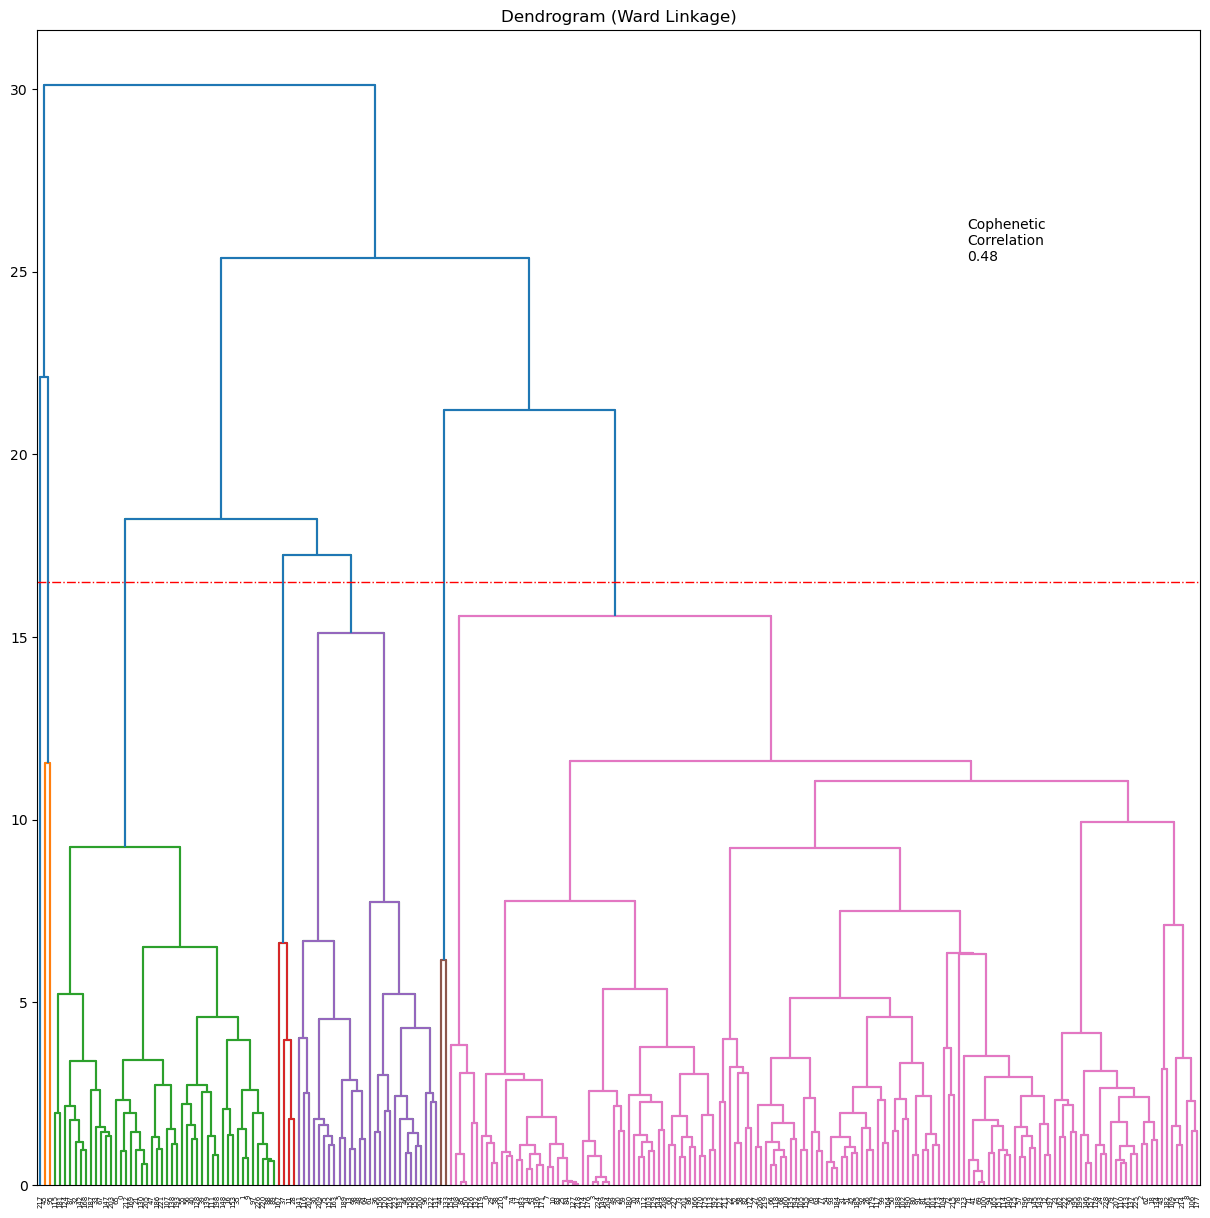

In [23]:
linkage_methods = ['ward']

compare_cols = ['Linkage', 'Cophenetic Coefficient']

fig, axs = plt.subplots(len(linkage_methods), 1 , figsize=(15,15))

for i, method in enumerate(linkage_methods):
    z = linkage(df_scaled, metric='euclidean', method = method)
    dendrogram(z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    coph_corr, coph_dist = cophenet(z, pdist(df_scaled))
    axs.annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}", (0.80, 0.80), xycoords="axes fraction")
    
dendrogram(z, color_threshold=16.5)

plt.axhline(y=16.5, c='red', lw=1, linestyle ='dashdot')
    

In [24]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(df_scaled)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [25]:
df_scaled["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [26]:
cluster_profile = df.groupby("HC_Clusters").mean()

/tmp/ipykernel_25283/2620494661.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profile = df.groupby("HC_Clusters").mean()


In [27]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Surface area"].count().values
)

In [28]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["country"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["country"].unique())
    print("-" * 100, "\n")    

The 44 countries in cluster 5 are:
['Afghanistan' 'Albania' 'Armenia' 'Bangladesh' 'Benin' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Central African Republic' 'Chad' 'Comoros'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Eritrea' 'Ethiopia' 'Guinea-Bissau'
 'Guinea' 'Guyana' 'Iran (Islamic Republic of)' 'Kenya'
 "Lao People's Democratic Republic" 'Liberia' 'Mali' 'Mauritania'
 'Mayotte' 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Saint Helena' 'Sierra Leone' 'Solomon Islands' 'Somalia'
 'Sudan' 'Syrian Arab Republic' 'Togo' 'Tonga' 'Uganda' 'Uzbekistan'
 'Vanuatu' 'Yemen']
---------------------------------------------------------------------------------------------------- 

The 148 countries in cluster 2 are:
['Algeria' 'American Samoa' 'Andorra' 'Anguilla' 'Antigua and Barbuda'
 'Argentina' 'Aruba' 'Austria' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bonair

Now the clusters seem to have more variability.

In [29]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,1857323.781250,45709.656250,97.065625,329348.031250,8.393750,43.871875,47.746875,4106.187500,4.906250,4.314063,107.571875,551.812500,32
1,6443631.500000,1374348.500000,300.250000,6637348.000000,13.100000,35.400000,51.450000,216953.500000,5.100000,3.700000,86.000000,1066.000000,2
2,220764.489865,10516.020270,331.800676,213967.959459,6.521284,24.186149,68.686149,915.722973,7.706081,5.362162,115.291216,120.317568,148
3,9833517.000000,324460.000000,35.500000,18036648.000000,1.000000,19.700000,79.300000,-796494.000000,17.100000,5.400000,117.600000,1513.000000,1
4,16.000000,331.000000,23395.700000,26218.000000,3.225000,10.000000,90.000000,8826.500000,5.375000,1.500000,206.600000,16.000000,2
5,460865.261364,32009.250000,144.247727,46650.704545,28.867045,23.895455,46.960227,-882.261364,5.530682,3.723864,69.051136,147.613636,44
